# 0.1_ss_math
- 数値計算系、chap4

In [2]:
s = 0

In [3]:
for i in range(1000):
        s += 0.001

In [4]:
s

1.0000000000000007

### やっちゃダメ

In [5]:
i = 0
s = 0
while s != 1.:
        print(s)
        s += 0.1
        i += 1
        if i > 12:
                break
                

0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999
1.0999999999999999
1.2


### 回避方法

In [7]:
eps = 1e-10
s = 0
while (abs(s-1.)) > eps:
        print(s)
        s += 0.1
print(s)

0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999


## 演算による桁落ち

In [8]:
import numpy as np

In [9]:
def qeq(a, b, c):
        d = np.sqrt(b**2 - 4*a*c)
        return ((-b+d)/(2*a), (-b-d)/(2*a))

In [10]:
qeq(1,5,6)

(-2.0, -3.0)

In [11]:
qeq(1, 1.000000001, 0.000000001)

(-1.0000000272292198e-09, -1.0)

In [12]:
np.sqrt(1.000000001**2 - 4 * 1 * 0.000000001)

0.999999999

#### 解消方法

In [13]:
def qeq(a, b, c):
        alpha = (-b - np.sign(b) * np.sqrt(b**2 - 4*a*c))/(2*a)
        beta = c/(a*alpha)
        return (alpha, beta)

In [14]:
qeq(1, 1.000000001, 0.000000001)

(-1.0, -1e-09)

## 数値範囲の考慮

In [15]:
def softplus(x):
        return np.log(1 + np.exp(x))

In [16]:
softplus(-1)

0.31326168751822286

In [17]:
softplus(0)

0.6931471805599453

In [18]:
softplus(1000)

/Users/shouta_shimizu/.pyenv/versions/3.7.0/envs/essense/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


inf

In [19]:
def softplus(x):
        return max(0, x) + np.log(1 + np.exp(-abs(x)))

In [20]:

softplus(-1)

0.31326168751822286

In [21]:

softplus(0)

0.6931471805599453

In [22]:

softplus(1000)

1000.0

In [23]:
softplus(-10000)


0.0

### Contour Plot

In [24]:
x = np.array([1, 2, 3])

In [25]:
y = np.array([4, 5, 6])

In [26]:
xmesh, ymesh = np.meshgrid(x, y)

In [27]:
xmesh

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [28]:
def f(x, y):
        return x**2 + y**2/4

In [40]:
x = np.linspace(-5, 5, 300)
y = np.linspace(-5, 5, 300)

In [30]:
xmesh, ymesh = np.meshgrid(x, y)

In [32]:
xmesh

array([[-5.        , -4.96655518, -4.93311037, ...,  4.93311037,
         4.96655518,  5.        ],
       [-5.        , -4.96655518, -4.93311037, ...,  4.93311037,
         4.96655518,  5.        ],
       [-5.        , -4.96655518, -4.93311037, ...,  4.93311037,
         4.96655518,  5.        ],
       ...,
       [-5.        , -4.96655518, -4.93311037, ...,  4.93311037,
         4.96655518,  5.        ],
       [-5.        , -4.96655518, -4.93311037, ...,  4.93311037,
         4.96655518,  5.        ],
       [-5.        , -4.96655518, -4.93311037, ...,  4.93311037,
         4.96655518,  5.        ]])

In [34]:
z = f(xmesh, ymesh)

In [35]:
z

array([[31.25      , 30.9166704 , 30.5855779 , ..., 30.5855779 ,
        30.9166704 , 31.25      ],
       [31.1666676 , 30.83333799, 30.5022455 , ..., 30.5022455 ,
        30.83333799, 31.1666676 ],
       [31.08389448, 30.75056487, 30.41947238, ..., 30.41947238,
        30.75056487, 31.08389448],
       ...,
       [31.08389448, 30.75056487, 30.41947238, ..., 30.41947238,
        30.75056487, 31.08389448],
       [31.1666676 , 30.83333799, 30.5022455 , ..., 30.5022455 ,
        30.83333799, 31.1666676 ],
       [31.25      , 30.9166704 , 30.5855779 , ..., 30.5855779 ,
        30.9166704 , 31.25      ]])

In [36]:
colors=['0.1','0.3','0.5','0.7']

In [37]:
levels = [1, 2, 3, 4, 5]

In [38]:
import matplotlib.pyplot as plt

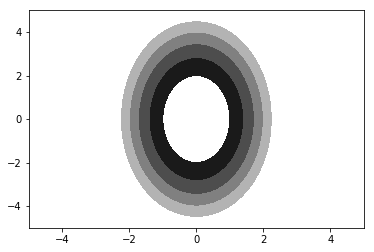

In [42]:
plt.contourf(x, y, z, colors=colors, levels=levels)

# 数理最適化

In [43]:
from scipy import optimize

In [48]:
c = np.array([-3., -4.])
G = np.array([[1., 4.], [2., 3.], [2., 1.]])
h = np.array([1700, 1400, 1000], dtype=np.float64)

In [51]:
sol = optimize.linprog(c, A_ub = G, b_ub = h, bounds=(0, None))

In [52]:
sol.x

array([400., 200.])

In [53]:
sol.fun

-2000.0